In [84]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn
import matplotlib
import warnings 

warnings.filterwarnings('ignore')

In [109]:
## READING FILE
df = pd.read_csv('/content/PETR4Daily.csv')

In [110]:
##scaler = StandardScaler()
##df[['Open', 'High', 'Low', 'Close','Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close','Volume']])

In [111]:
## Checking NaNs and Duplicates
print(df.isna().sum())
print('------------------------------')
print(df.count())
print('------------------------------')
print(df.duplicated().value_counts())

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Variation    0
dtype: int64
------------------------------
Date         2835
Open         2835
High         2835
Low          2835
Close        2835
Volume       2835
Variation    2835
dtype: int64
------------------------------
False    2824
True       11
dtype: int64


Feature Engineering:

1. Variaçoes entre aberturas e fechamentos entre dois dias consecutivos. 
2. Podemos gerar medias mensais e semanais de preços

In [118]:
## Criando Novas colunas

df['Last_day_variation'] = df['Variation']
df['last_day_close'] = df['Close']
df['last_day_opening'] = df['Open']
df['last_day_high'] = df['High']
df['last_day_low'] = df['Low']
df['last_day_vol'] = df['Volume']

In [119]:
## DEPOIS FAZER UMA FUNCAO
for i in range(1,len(df)):
  df['Last_day_variation'][i] = df['Variation'][i-1]
  df['last_day_close'][i] = df['Close'][i-1]
  df['last_day_opening'][i] = df['Open'][i-1]
  df['last_day_high'][i] = df['High'][i-1]
  df['last_day_low'][i] = df['Low'][i-1]
  df['last_day_vol'][i] = df['Volume'][i-1]

In [121]:
df.head()

,Date,Open,High,Low,Close,Volume,Variation,Last_day_variation,last_day_close,last_day_opening,last_day_high,last_day_low,last_day_vol
0,2011-01-03,22.03,22.44,22.51,21.96,22780000.0,-1.08,-1.08,21.96,22.03,22.44,22.51,22780000.0
1,2011-01-04,21.95,22.04,22.08,21.54,30970000.0,-0.36,-1.08,21.96,22.03,22.44,22.51,22780000.0
2,2011-01-05,22.21,21.77,22.32,21.69,24340000.0,1.18,-0.36,21.54,21.95,22.04,22.08,30970000.0
3,2011-01-06,22.12,22.20,22.41,22.04,24350000.0,-0.41,1.18,21.69,22.21,21.77,22.32,24340000.0
4,2011-01-07,21.81,22.05,22.18,21.81,17470000.0,-1.40,-0.41,22.04,22.12,22.20,22.41,24350000.0


In [122]:
features = df.drop('Date',axis = 1 )
features.head(5)

,Open,High,Low,Close,Volume,Variation,Last_day_variation,last_day_close,last_day_opening,last_day_high,last_day_low,last_day_vol
0,22.03,22.44,22.51,21.96,22780000.0,-1.08,-1.08,21.96,22.03,22.44,22.51,22780000.0
1,21.95,22.04,22.08,21.54,30970000.0,-0.36,-1.08,21.96,22.03,22.44,22.51,22780000.0
2,22.21,21.77,22.32,21.69,24340000.0,1.18,-0.36,21.54,21.95,22.04,22.08,30970000.0
3,22.12,22.20,22.41,22.04,24350000.0,-0.41,1.18,21.69,22.21,21.77,22.32,24340000.0
4,21.81,22.05,22.18,21.81,17470000.0,-1.40,-0.41,22.04,22.12,22.20,22.41,24350000.0


In [125]:
## Criando Novas colunas

df['Moving_avg_variation'] = df['Variation']
df['Moving_avg_close'] = df['Close']
df['Moving_avg_opening'] = df['Open']
df['Moving_avg_high'] = df['High']
df['Moving_avg_low'] = df['Low']
df['Moving_avg_vol'] = df['Volume']

In [126]:
features_moving_avg = ['Variation','Open','Close','High','Low','Volume']
new_features = ['Moving_avg_variation','Moving_avg_opening','Moving_avg_close',
                'Moving_avg_high', 'Moving_avg_low','Moving_avg_vol' ]

for j,k in zip(features_moving_avg,new_features):
  variation = 0 
  qtd = 0 
  mean = 0
  for i in range(1,len(df)-1):
    variation += df[j][i-1] 
    qtd += 1
    mean = variation/qtd
    df[k][i] = mean

In [191]:
## Definindo variaveis dependentes e independentes
x = df.drop('Close',axis = 1)
x = x.drop('Date',axis = 1)
x = x.drop('Open',axis = 1)	
x = x.drop('High',axis = 1)	
x = x.drop('Low',axis = 1)	
x = x.drop('Volume',axis = 1)
x = x.drop('Variation',axis = 1)

y = df['Close']

In [236]:
##X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3)
X_train = x[0:1834]
X_test = x[1835:2835]

Y_train = y[0:1834]
Y_test = y[1835:2835]


In [237]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


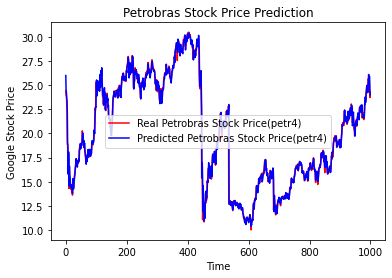

In [239]:
#visualising the results
Y_test = list(Y_test)
plt.plot(Y_test, color = 'red', label = 'Real Petrobras Stock Price(petr4)')
plt.plot(y_pred, color = 'blue', label = 'Predicted Petrobras Stock Price(petr4)')
plt.title('Petrobras Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [230]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9870037281607812


In [201]:
y_pred

array([25.98822414, 24.35629741, 24.27636461, 23.63651982, 23.39085519,
       22.02883443, 19.04490857, 18.6614707 , 15.78069995, 18.10186611,
       17.86789575, 14.56013527, 16.6142164 , 15.66516671, 15.44339018,
       14.8091634 , 14.38474235, 14.59005964, 14.68116282, 14.33287705,
       14.34281056, 14.16412977, 13.78736981, 14.47628176, 15.33763596,
       14.23117445, 14.31238695, 14.85672639, 15.19112186, 15.66665966,
       15.72766422, 16.31433293, 16.5695408 , 16.6275216 , 17.40009559,
       16.85186527, 17.035878  , 16.78603497, 16.5205019 , 17.03392046,
       17.20322373, 16.9872879 , 17.3353259 , 17.1465616 , 17.44450803,
       18.30334625, 18.33382806, 18.70661631, 18.96990886, 18.41953524,
       18.81041424, 18.90506229, 18.76264976, 19.00602085, 19.31363184,
       20.06110606, 20.01067374, 19.60891718, 19.06999453, 19.2828838 ,
       18.5491873 , 18.97645661, 18.99244479, 18.12406462, 18.01479821,
       17.58698548, 17.48153685, 16.81995819, 17.42764719, 17.07

In [215]:
Y_test = list(Y_test)
erro = []
for i in range(len(Y_test)):
  erro.append(Y_test[i] - y_pred[i])

In [220]:
erro_medio = sum(erro)/len(erro)
erro_medio

-0.025114223499868714

In [221]:
X_train

,Last_day_variation,last_day_close,last_day_opening,last_day_high,last_day_low,last_day_vol,Moving_avg_variation,Moving_avg_close,Moving_avg_opening,Moving_avg_high,Moving_avg_low,Moving_avg_vol
0,-1.08,21.96,22.03,22.44,22.51,22780000.0,-1.080000,21.960000,22.030000,22.440000,22.510000,2.278000e+07
1,-1.08,21.96,22.03,22.44,22.51,22780000.0,-1.080000,21.960000,22.030000,22.440000,22.510000,2.278000e+07
2,-0.36,21.54,21.95,22.04,22.08,30970000.0,-0.720000,21.750000,21.990000,22.240000,22.295000,2.687500e+07
3,1.18,21.69,22.21,21.77,22.32,24340000.0,-0.086667,21.730000,22.063333,22.083333,22.303333,2.603000e+07
4,-0.41,22.04,22.12,22.20,22.41,24350000.0,-0.167500,21.807500,22.077500,22.112500,22.330000,2.561000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1.15,21.60,21.98,22.12,22.21,80990000.0,0.041892,14.859787,15.081268,15.101843,15.330837,3.923573e+07
1830,8.14,22.28,23.77,22.35,23.79,117660000.0,0.046317,14.863842,15.086016,15.105803,15.335459,3.927858e+07
1831,3.91,23.91,24.70,24.12,25.41,126700000.0,0.048427,14.868782,15.091267,15.110726,15.340961,3.932633e+07
1832,-1.17,24.39,24.41,24.78,25.24,72660000.0,0.047762,14.873979,15.096354,15.116004,15.346365,3.934453e+07


In [223]:
Y_train

0       21.96
1       21.54
2       21.69
3       22.04
4       21.81
        ...  
1829    22.28
1830    23.91
1831    24.39
1832    24.76
1833    24.84
Name: Close, Length: 1834, dtype: float64